In [1]:
# import required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
# importing dataset
url= 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url)   

In [5]:
print(df.head())

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55  


In [6]:
# basic information about dataset
print(df.shape)


(2035, 8)


In [7]:
print(df.dtypes)

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object


In [8]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


In [9]:
# descriptive statistics
print(df.describe())

              Open         High          Low         Last       Close  \
count  2035.000000  2035.000000  2035.000000  2035.000000  2035.00000   
mean    149.713735   151.992826   147.293931   149.474251   149.45027   
std      48.664509    49.413109    47.931958    48.732570    48.71204   
min      81.100000    82.800000    80.000000    81.000000    80.95000   
25%     120.025000   122.100000   118.300000   120.075000   120.05000   
50%     141.500000   143.400000   139.600000   141.100000   141.25000   
75%     157.175000   159.400000   155.150000   156.925000   156.90000   
max     327.700000   328.750000   321.650000   325.950000   325.75000   

       Total Trade Quantity  Turnover (Lacs)  
count          2.035000e+03      2035.000000  
mean           2.335681e+06      3899.980565  
std            2.091778e+06      4570.767877  
min            3.961000e+04        37.040000  
25%            1.146444e+06      1427.460000  
50%            1.783456e+06      2512.030000  
75%          

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB
None


In [11]:
# detecting null values
print(df.isnull().sum())

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64


In [12]:
df = df.reset_index()['Close']


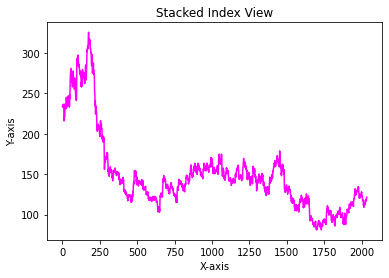

In [14]:
# visualization of dataset
plt.plot(df, color = 'magenta')
plt.title("Stacked Index View")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [19]:
# splitting a dataset
train_size = int(len(df1)*0.65)
test_size = len(df1) - train_size
train_data, test_data = df1[0:train_size,:],df1[train_size:len(df1),:1]


In [20]:
# data preprocessing
def create_data(dataset,time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
time_step = 100
x_train, y_train = create_data(train_data,time_step)
x_test,y_test = create_data(test_data,time_step)

In [21]:
x_train


array([[0.62418301, 0.62214052, 0.62622549, ..., 0.83455882, 0.86213235,
        0.85273693],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.86213235, 0.85273693,
        0.87111928],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.85273693, 0.87111928,
        0.84497549],
       ...,
       [0.34517974, 0.31781046, 0.33047386, ..., 0.2816585 , 0.27001634,
        0.26531863],
       [0.31781046, 0.33047386, 0.32128268, ..., 0.27001634, 0.26531863,
        0.27389706],
       [0.33047386, 0.32128268, 0.34007353, ..., 0.26531863, 0.27389706,
        0.25347222]])

In [24]:
x_train.shape,y_train.shape

((1221, 100), (1221,))

In [25]:
x_test.shape,y_test.shape

((612, 100), (612,))

In [26]:
# reshaping the dataset
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [27]:
import tensorflow

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [30]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
# model trainning
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs = 100, batch_size = 64, verbose = 1)


20/20 [==============================] - 4s 206ms/step - loss: 8.1503e-04 - val_loss: 8.8230e-04
Epoch 21/100
20/20 [==============================] - 4s 208ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 22/100
20/20 [==============================] - 6s 313ms/step - loss: 8.0081e-04 - val_loss: 6.7936e-04
Epoch 23/100
20/20 [==============================] - 4s 206ms/step - loss: 7.7799e-04 - val_loss: 9.4624e-04
Epoch 24/100
20/20 [==============================] - 4s 206ms/step - loss: 8.6274e-04 - val_loss: 6.6289e-04
Epoch 25/100
20/20 [==============================] - 4s 207ms/step - loss: 7.0966e-04 - val_loss: 7.3465e-04
Epoch 26/100
20/20 [==============================] - 4s 207ms/step - loss: 7.1461e-04 - val_loss: 9.2284e-04
Epoch 27/100
20/20 [==============================] - 4s 209ms/step - loss: 6.5895e-04 - val_loss: 7.9224e-04
Epoch 28/100
20/20 [==============================] - 4s 209ms/step - loss: 6.5880e-04 - val_loss: 7.2041e-04
Epoch 29/100
20/20 [===========

In [32]:
# model testing
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [34]:
# model evaluation
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))



166.38481369385372

In [35]:
math.sqrt(mean_squared_error(y_test,test_predict))


116.22279089477853

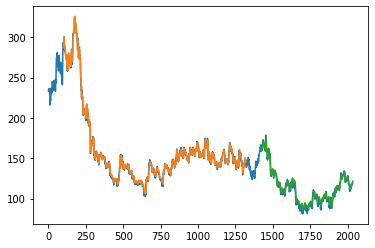

In [36]:
look_back = 100

# shift train prediction
trainPredict = np.empty_like(data1)
trainPredict[:,:] = np.nan
trainPredict[look_back:len(train_predict)+look_back, :] = train_predict

# shift test prediction
testPredict = np.empty_like(data1)
testPredict[:,:] = np.nan
testPredict[len(train_predict) + (look_back * 2)+1:len(data1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(data1))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()
